# Cleaning_And_Analyzing_Employee_Exit_Surveys

In this project, we worked with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education) (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we played the role of data analyst and pretended our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

In [1]:
# importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading files
dete_survey = pd.read_csv('dete_survey.csv')

tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
# displaying info of dataframe

print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
# examining first five rows of dete_survey
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
# examining number of null values
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

`dete_survey` contains 18 columns of bool dtype and 37 columns of object
dtype with only one of int. There are huge null values in the dataframe as several columns comprise more than 80-90% of null values in the dataframe. Furthermore, this dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

In [6]:
# displaying info and first five rows of tafe_survey

tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
# displaying first five rows of tafe_survey

tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
# examining number of null values in tafe_survey
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

`tafe_survey` contains 72 columns of object dtype and 2 columns pf float
dtype. This dataframe comparatively contains lesser null values than `dete_survey`. Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis. Each dataframe contains many of the same columns, but the column names are different. There are multiple columns having answers that indicate an employee resigned because they were dissatisfied. 

In [9]:
# reading `dete_survey` into pandas again to correct `Not Stated` as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
# dropping few columns from dete_survey that are unnecessary
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [11]:
# dropping few columns from tafe_survey that are not needed
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [12]:
# checking the columns
print(dete_survey_updated.columns)
print('\n')
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

In [13]:
# renaming the columns in the dete_survey_updated
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.replace(' ', '_')
                               .str.strip()
                               .str.lower()
                              )
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [14]:
# renaming the columns in the tafe_survey_updated
cols_to_update = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
                  'Reason for ceasing employment': 'separationtype',
                  'Gender. What is your Gender?': 'gender',
                  'CurrentAge. Current Age': 'age',
                  'Employment Type. Employment Type': 'employment_status', 
                  'Classification. Classification': 'position', 
                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                  'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                 }
tafe_survey_updated = tafe_survey_updated.rename(cols_to_update, axis=1)
# Checking that the column names were updated correctly
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [15]:
# reviewing unique values in seperationtype column in both dataframes
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
# Updating all separationtypes to have only one word 'Resignation' alongwith
# other seperationtypes
dete_survey_updated['separationtype'] = (dete_survey_updated['separationtype']
                                         .str.split('-')
                                         .str[0]
                                        )
# Checking if the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [18]:
# selecting only resignationtype column in both dataframes using df.copy()
# method to ignore SettingWithCopy Warning
dete_resignations = (dete_survey_updated[dete_survey_updated
                                         .separationtype == 'Resignation']
                                             .copy())

tafe_resignations = (tafe_survey_updated
                     [tafe_survey_updated['separationtype'] == 'Resignation']
                                             .copy())

In [19]:
# checking the Years in dete_resignations for inconsistencies
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [20]:
# extracting only the year with 4-digits
dete_resignations['cease_date'] = (dete_resignations['cease_date']
                                   .str.split('/').str[-1]
                                  )
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [21]:
# converting the cease_date to float dtype
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [22]:
# checking for unique values in the dete_start_date column in dete_resignations
# for any outlier(s)
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [23]:
# checking for unique values in the tafe_resignations for cease_date
# for any outlier(s)
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

The years in both dataframes don't completely align. The `tafe_survey_updated` dataframe contains some cease dates in 2009, but the `dete_survey_updated` dataframe does not. The `tafe_survey_updated` dataframe also contains many more cease dates in 2010 than the `dete_survey_updaed` dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

In [24]:
# reviewing dete_resignations to look for data to calculate the employee service
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [25]:
# since our end goal requires determining the length of employees service and  
# after looking at above dataframe we will create institute_service column
# in dete_resignations by substracting the cease_date and dete_start_date columns
dete_resignations['institute_service'] = (dete_resignations['cease_date'] - 
                                          dete_resignations['dete_start_date']
                                         )
# checking the newly created column
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [26]:
# determining the count of resignations due to dissatisfaction
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [28]:
# updating the above columns in the tafe_registration to contain True, False,
# or NaN values

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

# applying above function to update values in the relevant columns
tafe_resignations['dissatisfied'] = (tafe_resignations[
    ['Contributing Factors. Dissatisfaction',
     'Contributing Factors. Job Dissatisfaction']]
    .applymap(update_vals).any(axis=1, skipna=False)
    )

# creating a copy to avoid the SettingWithCopy Warning
tafe_resignations_up = tafe_resignations.copy()

# examining the values in the tafe_resignations_up
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [29]:
# updating the above columns in the dete_registration to contain True, False,
# or NaN values

# applying above function to update values in the relevant columns
dete_resignations['dissatisfied'] = (dete_resignations[
    ['job_dissatisfaction',
     'dissatisfaction_with_the_department',
     'physical_work_environment',
     'lack_of_recognition', 
     'lack_of_job_security', 
     'work_location',
     'employment_conditions', 
     'work_life_balance',
     'workload']]
    .any(axis=1, skipna=False)
    )

# creating a copy to avoid the SettingWithCopy Warning
dete_resignations_up = dete_resignations.copy()

# examining the values in the tafe_resignations_up
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [30]:
# adding a column institute to both dataframesBelow, we'll add an
# institute column so that we can differentiate the data from each
# survey after we combine them.

dete_resignations_up['institute'] = 'DETE'

tafe_resignations_up['institute'] = 'TAFE'

In [31]:
# combining both above dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up],
                     ignore_index=True)

# checking for non-null values in the dataframe
combined.notnull().sum().sort_values(ascending=False)

C:\Users\ABC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


institute                                              651
separationtype                                         651
id                                                     651
dissatisfied                                           643
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
Institute                                              340
WorkArea                                               340
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Job Dissatisfaction              332
Contributing Factors. Maternity/Family                 332
Contributing Factors. NONE                             332
Contributing Factors. Ill Health                       3

In [32]:
# dropping columns having less than 500 non null values after considering
# above results
combined_updated = combined.dropna(axis=1, thresh=500).copy()

combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


We'll clean the institute_service column and categorize employees according to the following definitions:

- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

In [33]:
# checking the unique values in the institute service column
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [35]:
# extracting the years of service from service_column converting it to float
combined_updated['institute_service_up'] = (combined_updated['institute_service']
                                            .astype('str')
                                            .str.extract(r'(\d+)')
                                            .astype('float')
                                           )

# verifying the years extracted
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [36]:
# mapping values to one of the defined career level above

# Convert years of employees service to defined categories
def service_level(value):
    if value >= 11:
        return "Veteran"
    elif 7 <= value < 11:
        return "Established"
    elif 3 <= value < 7:
        return "Experienced"
    elif pd.isnull(value):
        return np.nan
    else:
        return "New"

combined_updated['service_cat'] = (combined_updated['institute_service_up']
                                   .apply(service_level)
                                  )

# checking the updated dataframe with defined categories
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [37]:
# verifying the unique values in the dissatisfied column of combined updated
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [38]:
# above results depict that False are the most frequent value and therefore
# we'll replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [39]:
# calculating the percentage of dissatisfied employees in each service category
dissatisfied_pct = combined_updated.pivot_table(values='dissatisfied',
                                                index='service_cat')

# examining the dissatisfied_pct dataframe 
dissatisfied_pct

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


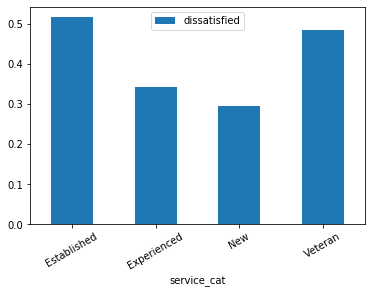

In [40]:
# plotting the dataframe, dissatisfied_pct
dissatisfied_pct.plot(kind='bar', rot=30)
plt.legend(loc='best')

After looking at above analysis above, we may conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.